#YOLO (You Only Look Once)

Think back to our previous CNN models. When using them to detect objects we could only classify if something was in an image, and it ran relatively slow. Lets say we wanted to detect not only if an object was in an image but where it is in an image, and we wanted to do this in real time. This is called object detection and CNN's are not optimized for this kind of problem.

This is where YOLO comes in. Yolo is a machine learning algorithm designed to detect and draw bounding boxes around objects in real time!!!

<img src="https://pjreddie.com/media/image/sayit.jpg">

##Yolo Algorithm

YOLO uses CNN's on subsections of an image to both speed up computations to perform in real time, and to also draw bounding boxes.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*vw1B_QcwqxSbdghf.png">

###Output


<img src="https://files.codebasics.io/uploads/images/blog-understanding-yolo03.png">

In a CNN, our output is similar to that of any other classification network. Where we either output a single neuron for binary, or k amount of neurons corresponding to the probability of each class. However we are predicting much more information with the YOLO model. 

In the example above we have an image of a dog. We want to predict multiple things, firstly, a bounding box around an object, and also the probability of a certain object being in that box. In the output you can see we have multiple variables in our output vector. 


*   Pc = probability of specified class being in box
*   Bx,By, Bw, Bh = The coordinates of the center of the box, along with height and width

*   C1, C2 = a prediction of which class is in the box, similar to what we have been doing





###How does YOLO draw boxes?

Firstly, YOLO breaks an image into k number of grids. These subsections are used to both speed up the YOLO and are also able to help us detect the location of an object in the image. A CNN operates in each small subsection and detects if there is an object in the subsection. It then creates a probability of a certain class being in each subsection. Below you can see a highlighted version of what these predictions look like. 



YOLO then tries to draw a bounding box for each class. Error for the bounding box is found via a method called Intersection Over Union. This process takes our divides the area of a predicted box by the ground truth. This is used to calculate the similarity between our label and our prediction. Our goal is to get our boxes as similar as possible during training.

Finally, when predicting our YOLO model will draw multiple bounding boxes for each object and will choose the one with the highest confidence score, this can be seen below.



<img src="https://leimao.github.io/images/blog/2019-04-15-YOLOs/yolo_v1_diagram.png">

#The Code

Thanks to the YOLO team the code is extremely simple. We will want to start out by installing and importing ultralytics, the library that contains our YOLO models.

In [ ]:
!pip install ultralytics==8.0.20

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.9/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The data is also very simple however we will want to pay attention to the data format. YOLO models have specific formats for each model, for example you may find data with the labels writtin in xml format, this can work for some other models but our YOLO model wants these boxes in .txt format. However solving this is very simple.

##Data

###Roboflow

Roboflow is an online tool specifically made for handling these image formats. It offers tools such as annotizing images by hand drawing bounding boxes, format conversion, and even allows you to upload and download datasets.

It is similar to the popular labelling program LabelImg, however it doesn't require you to download software. Which I think is very nice 👍.

## .

For our purposes I have already found and converted a dataest into the format we need. You can get access to it by git cloning the repository below.

In [ ]:
!git clone https://github.com/utkML/Runescape_cow_YOLOV8.git

fatal: destination path 'Runescape_cow_YOLOV8' already exists and is not an empty directory.


You might see that the repository has multiple files. We have image files for our train, test, and validation split, as well as a data.yaml.

This yaml file is passed to the YOLO model to begin training.It specifies the directory to our files as well as the number of classes, and class names. Although one is included for us via Roboflow, we will make our own since depending on where you store this file directories may change.

In [ ]:
import yaml

OSRS_yaml = dict(
    directory = '/content/Runescape_cow_YOLOV8/OSRS_cows',
    train = '/content/Runescape_cow_YOLOV8/OSRS_cows/train',
    val = '/content/Runescape_cow_YOLOV8/OSRS_cows/valid',
    test = '/content/Runescape_cow_YOLOV8/OSRS_cows/test',

    nc = 3,

    names = [   
    'cow',
    'cowhide',
    'player'
    ]
)

with open('OSRS_yaml.yaml', 'w') as outfile:
    yaml.dump(OSRS_yaml, outfile, default_flow_style=True)

In [ ]:
!cat OSRS_yaml.yaml

{directory: /content/Runescape_cow_YOLOV8/OSRS_cows, names: [cow, cowhide, player],
  nc: 3, test: /content/Runescape_cow_YOLOV8/OSRS_cows/test, train: /content/Runescape_cow_YOLOV8/OSRS_cows/train,
  val: /content/Runescape_cow_YOLOV8/OSRS_cows/valid}


It is now time to train our model, we will import the YOLOV8 nano model for the sake of time. 

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt") 

I thought it was a bit strange but to train our YOLO model we actually have to do a command line call. When doing this we set our task, our model, our yaml, image size and epochs.

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=OSRS_yaml.yaml epochs=10 imgsz=640

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=OSRS_yaml.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, work

After training our model will save a file with our new trained weights, along with statistics and our predictions. We can use the python dsiplay library to view these, or if you are using colab you can view them through the file manager.

In [ ]:
from IPython.display import Image

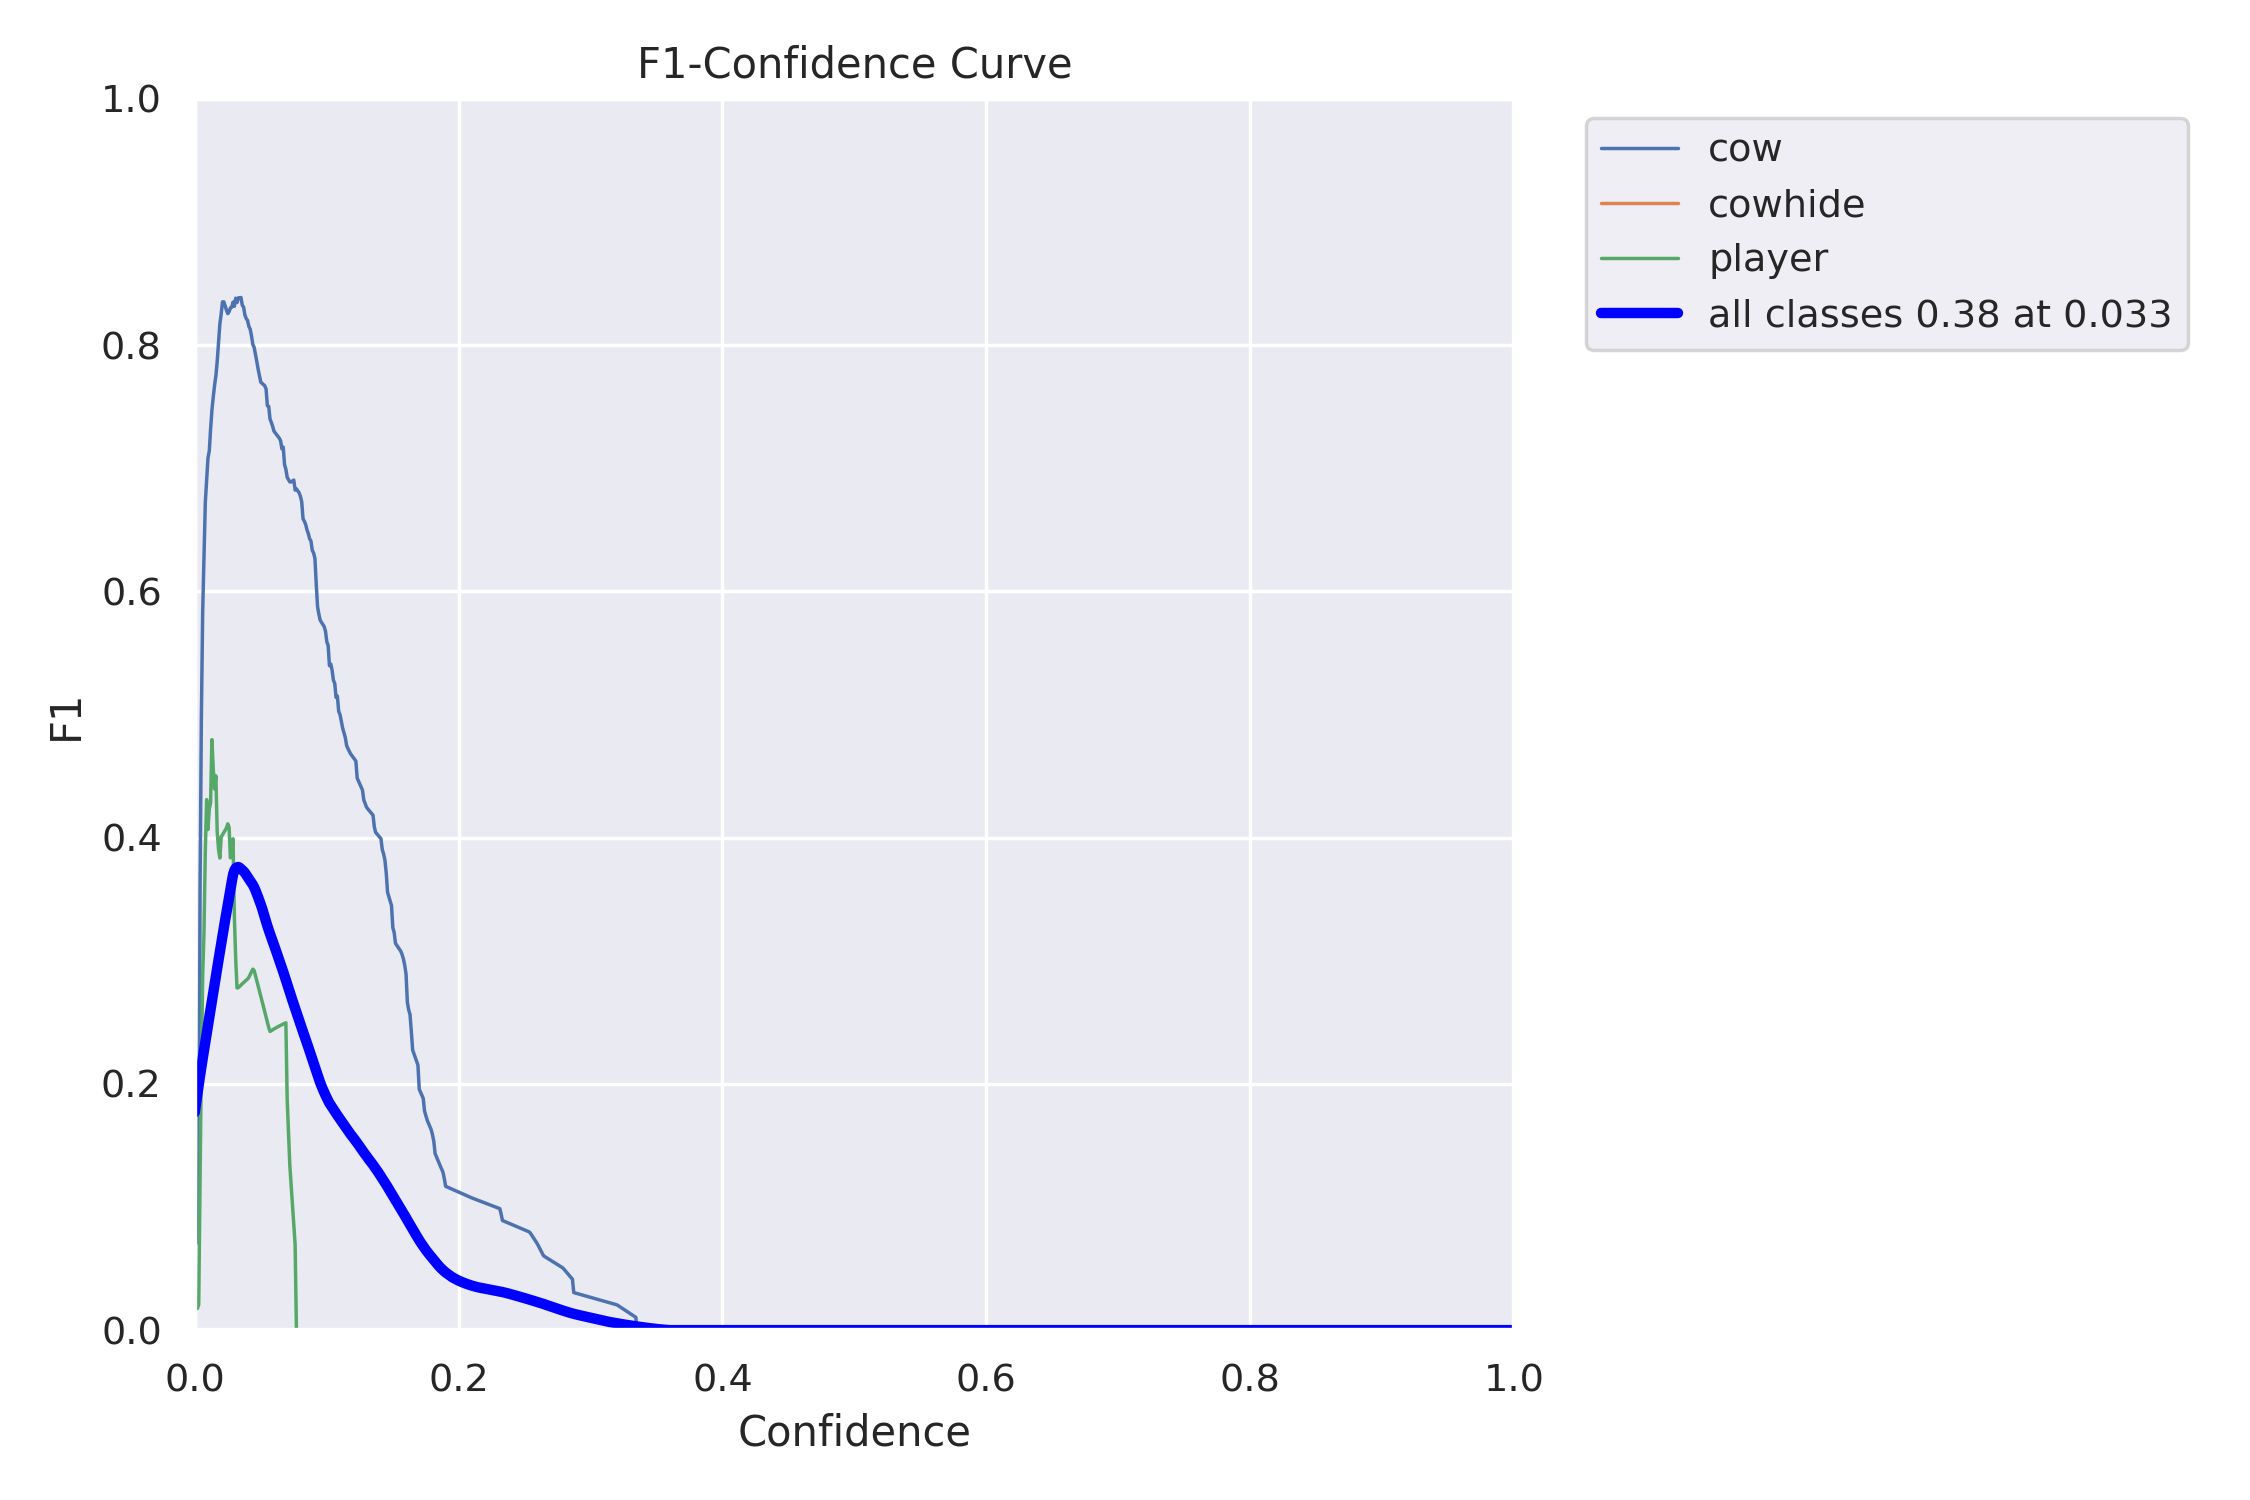

In [ ]:
Image('/content/runs/detect/train/F1_curve.png', width = 1000, height = 600)

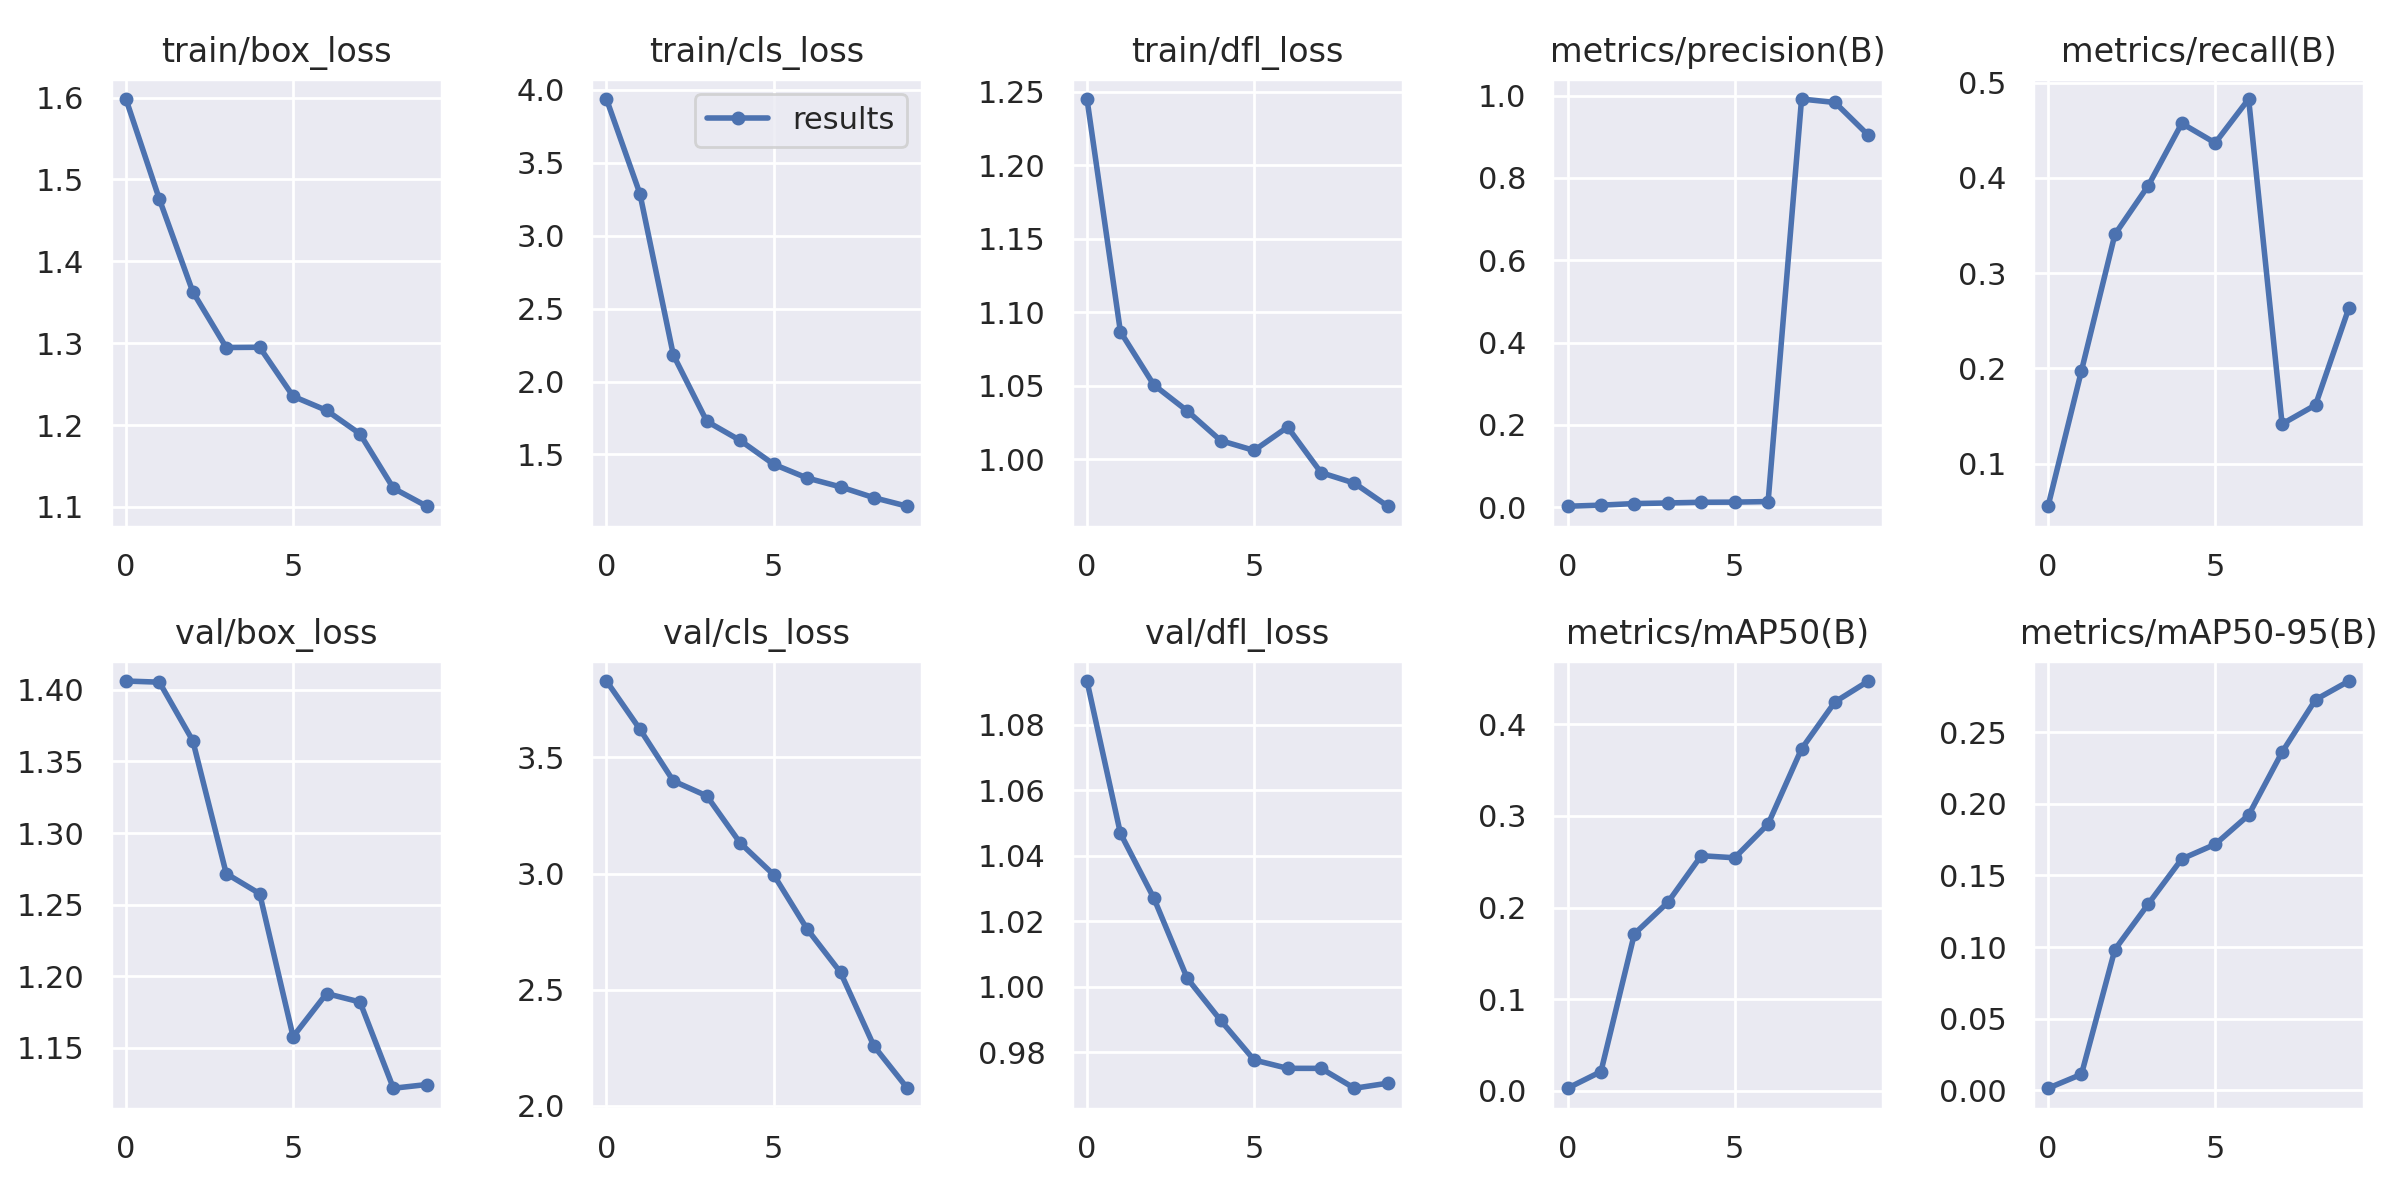

In [ ]:
Image('/content/runs/detect/train/results.png', width = 1000, height = 600)

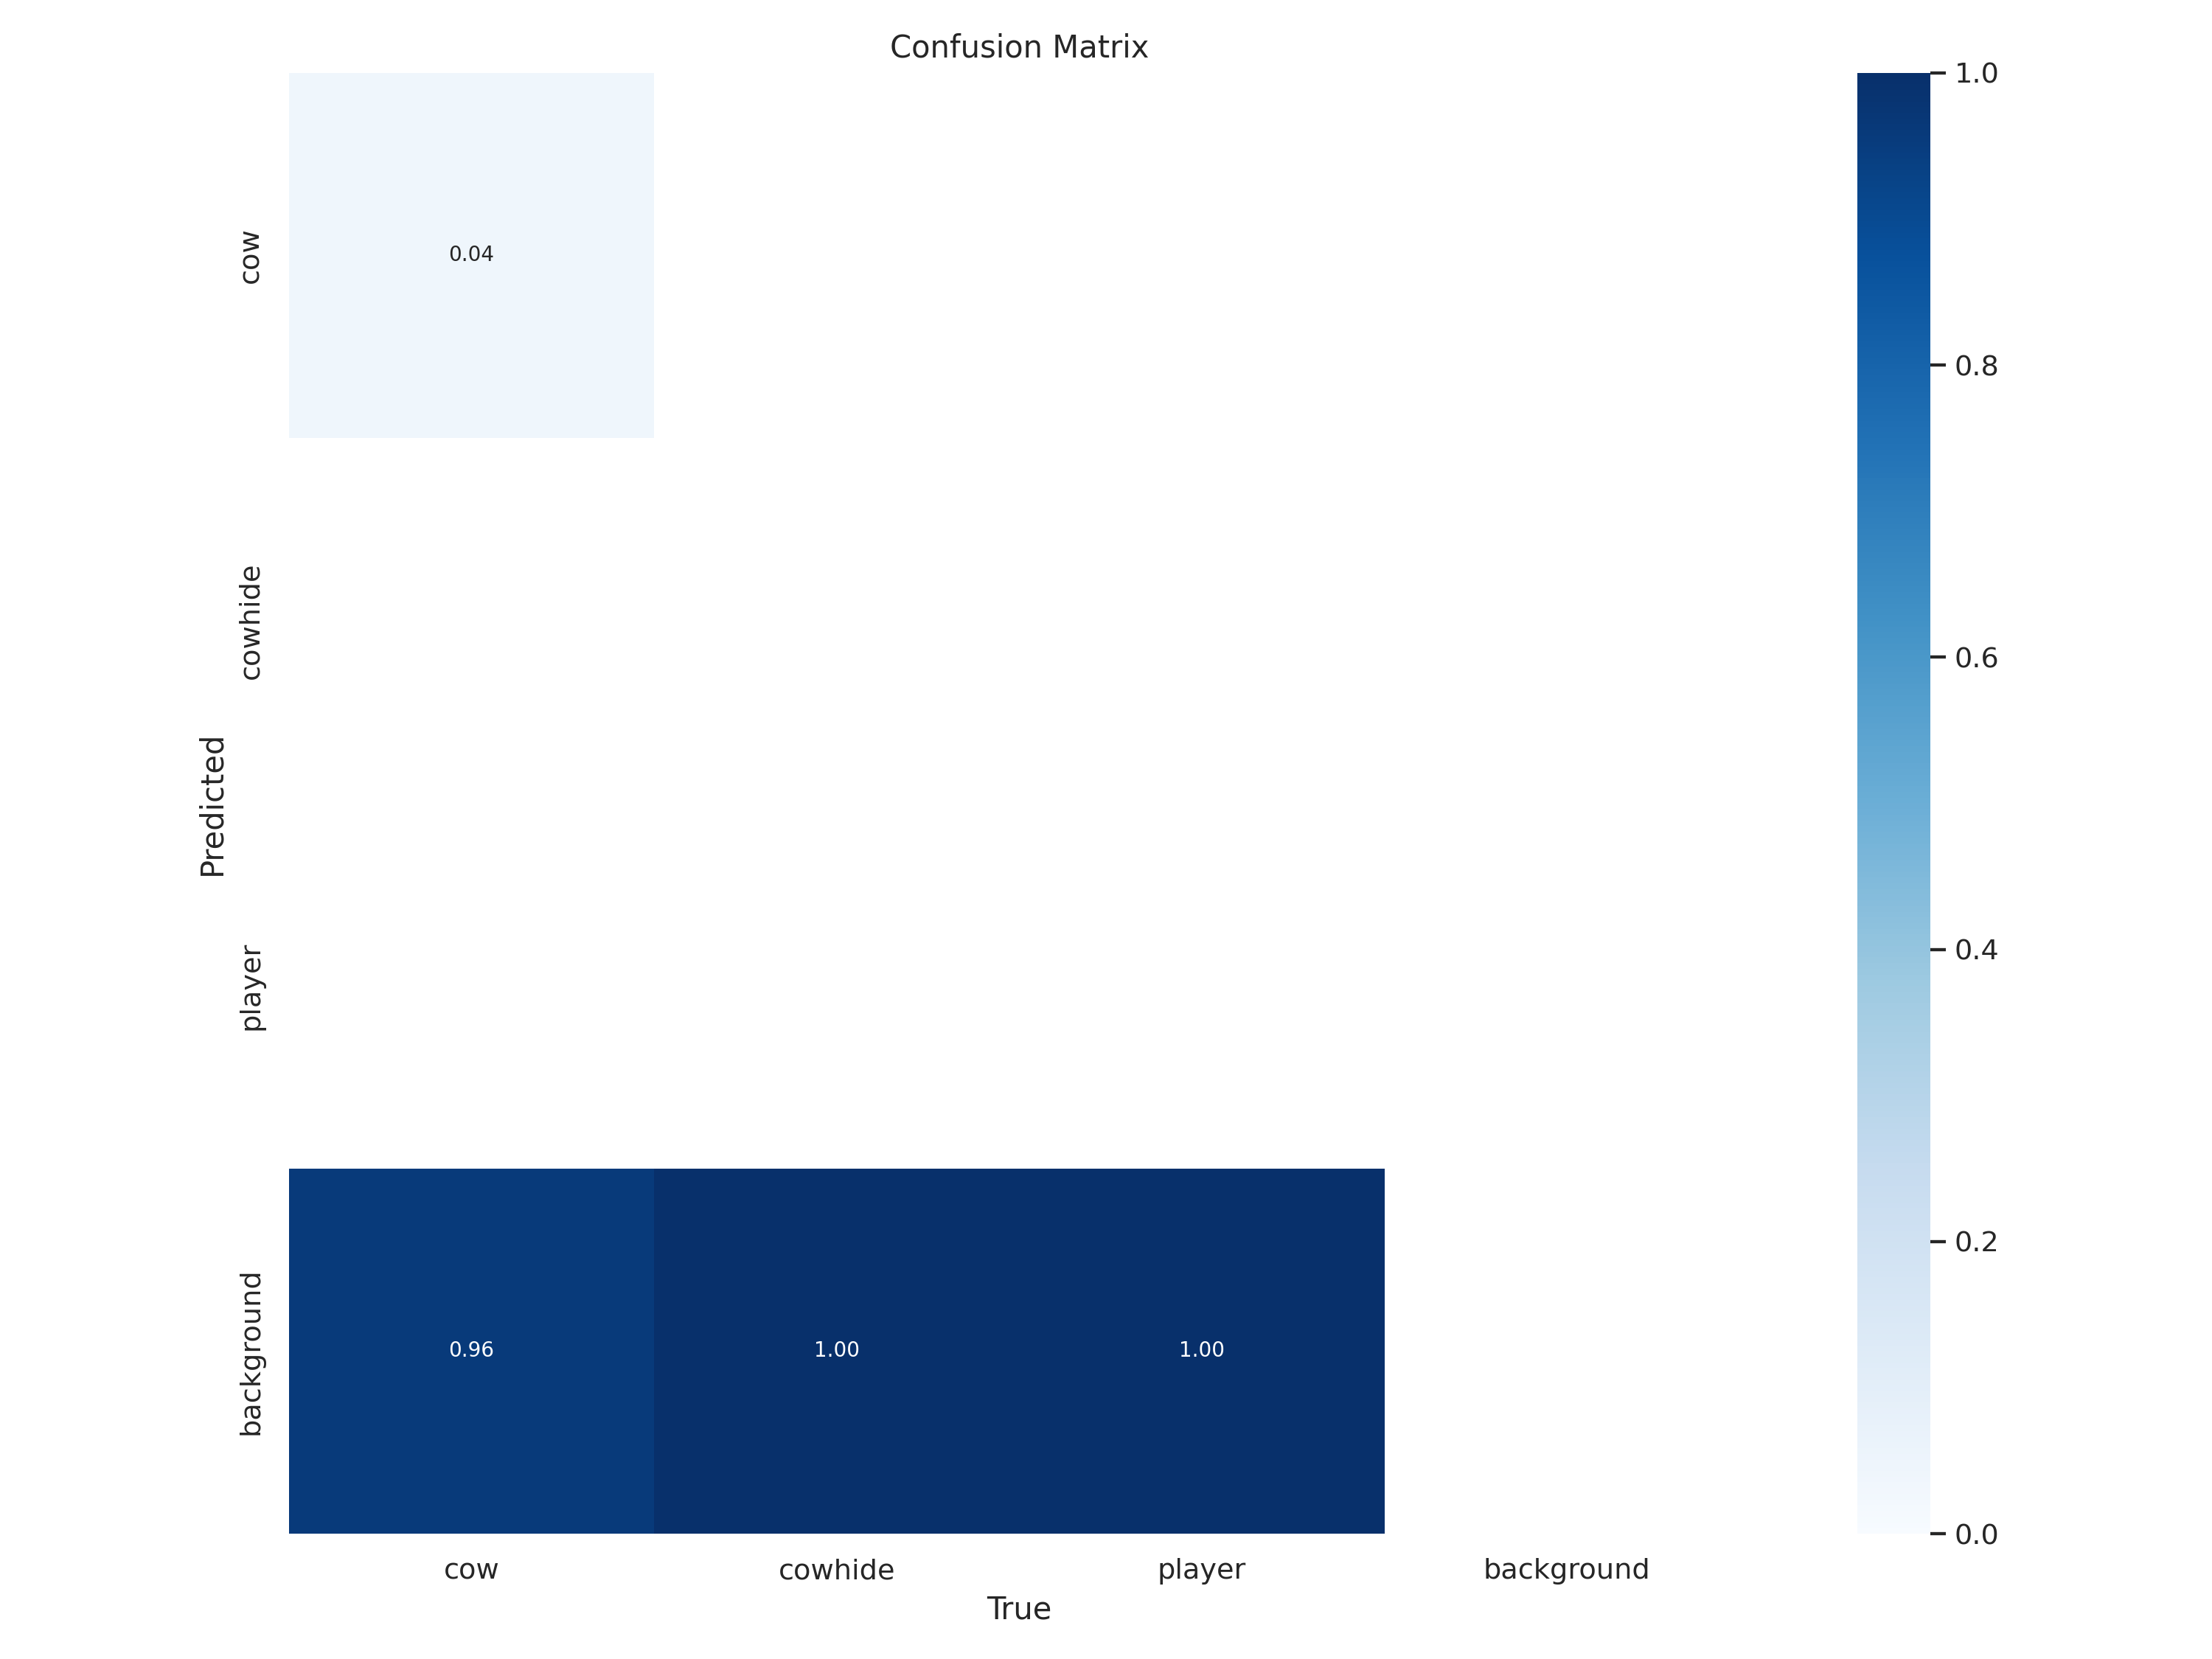

In [ ]:
Image('/content/runs/detect/train/confusion_matrix.png', width = 1000, height = 750)

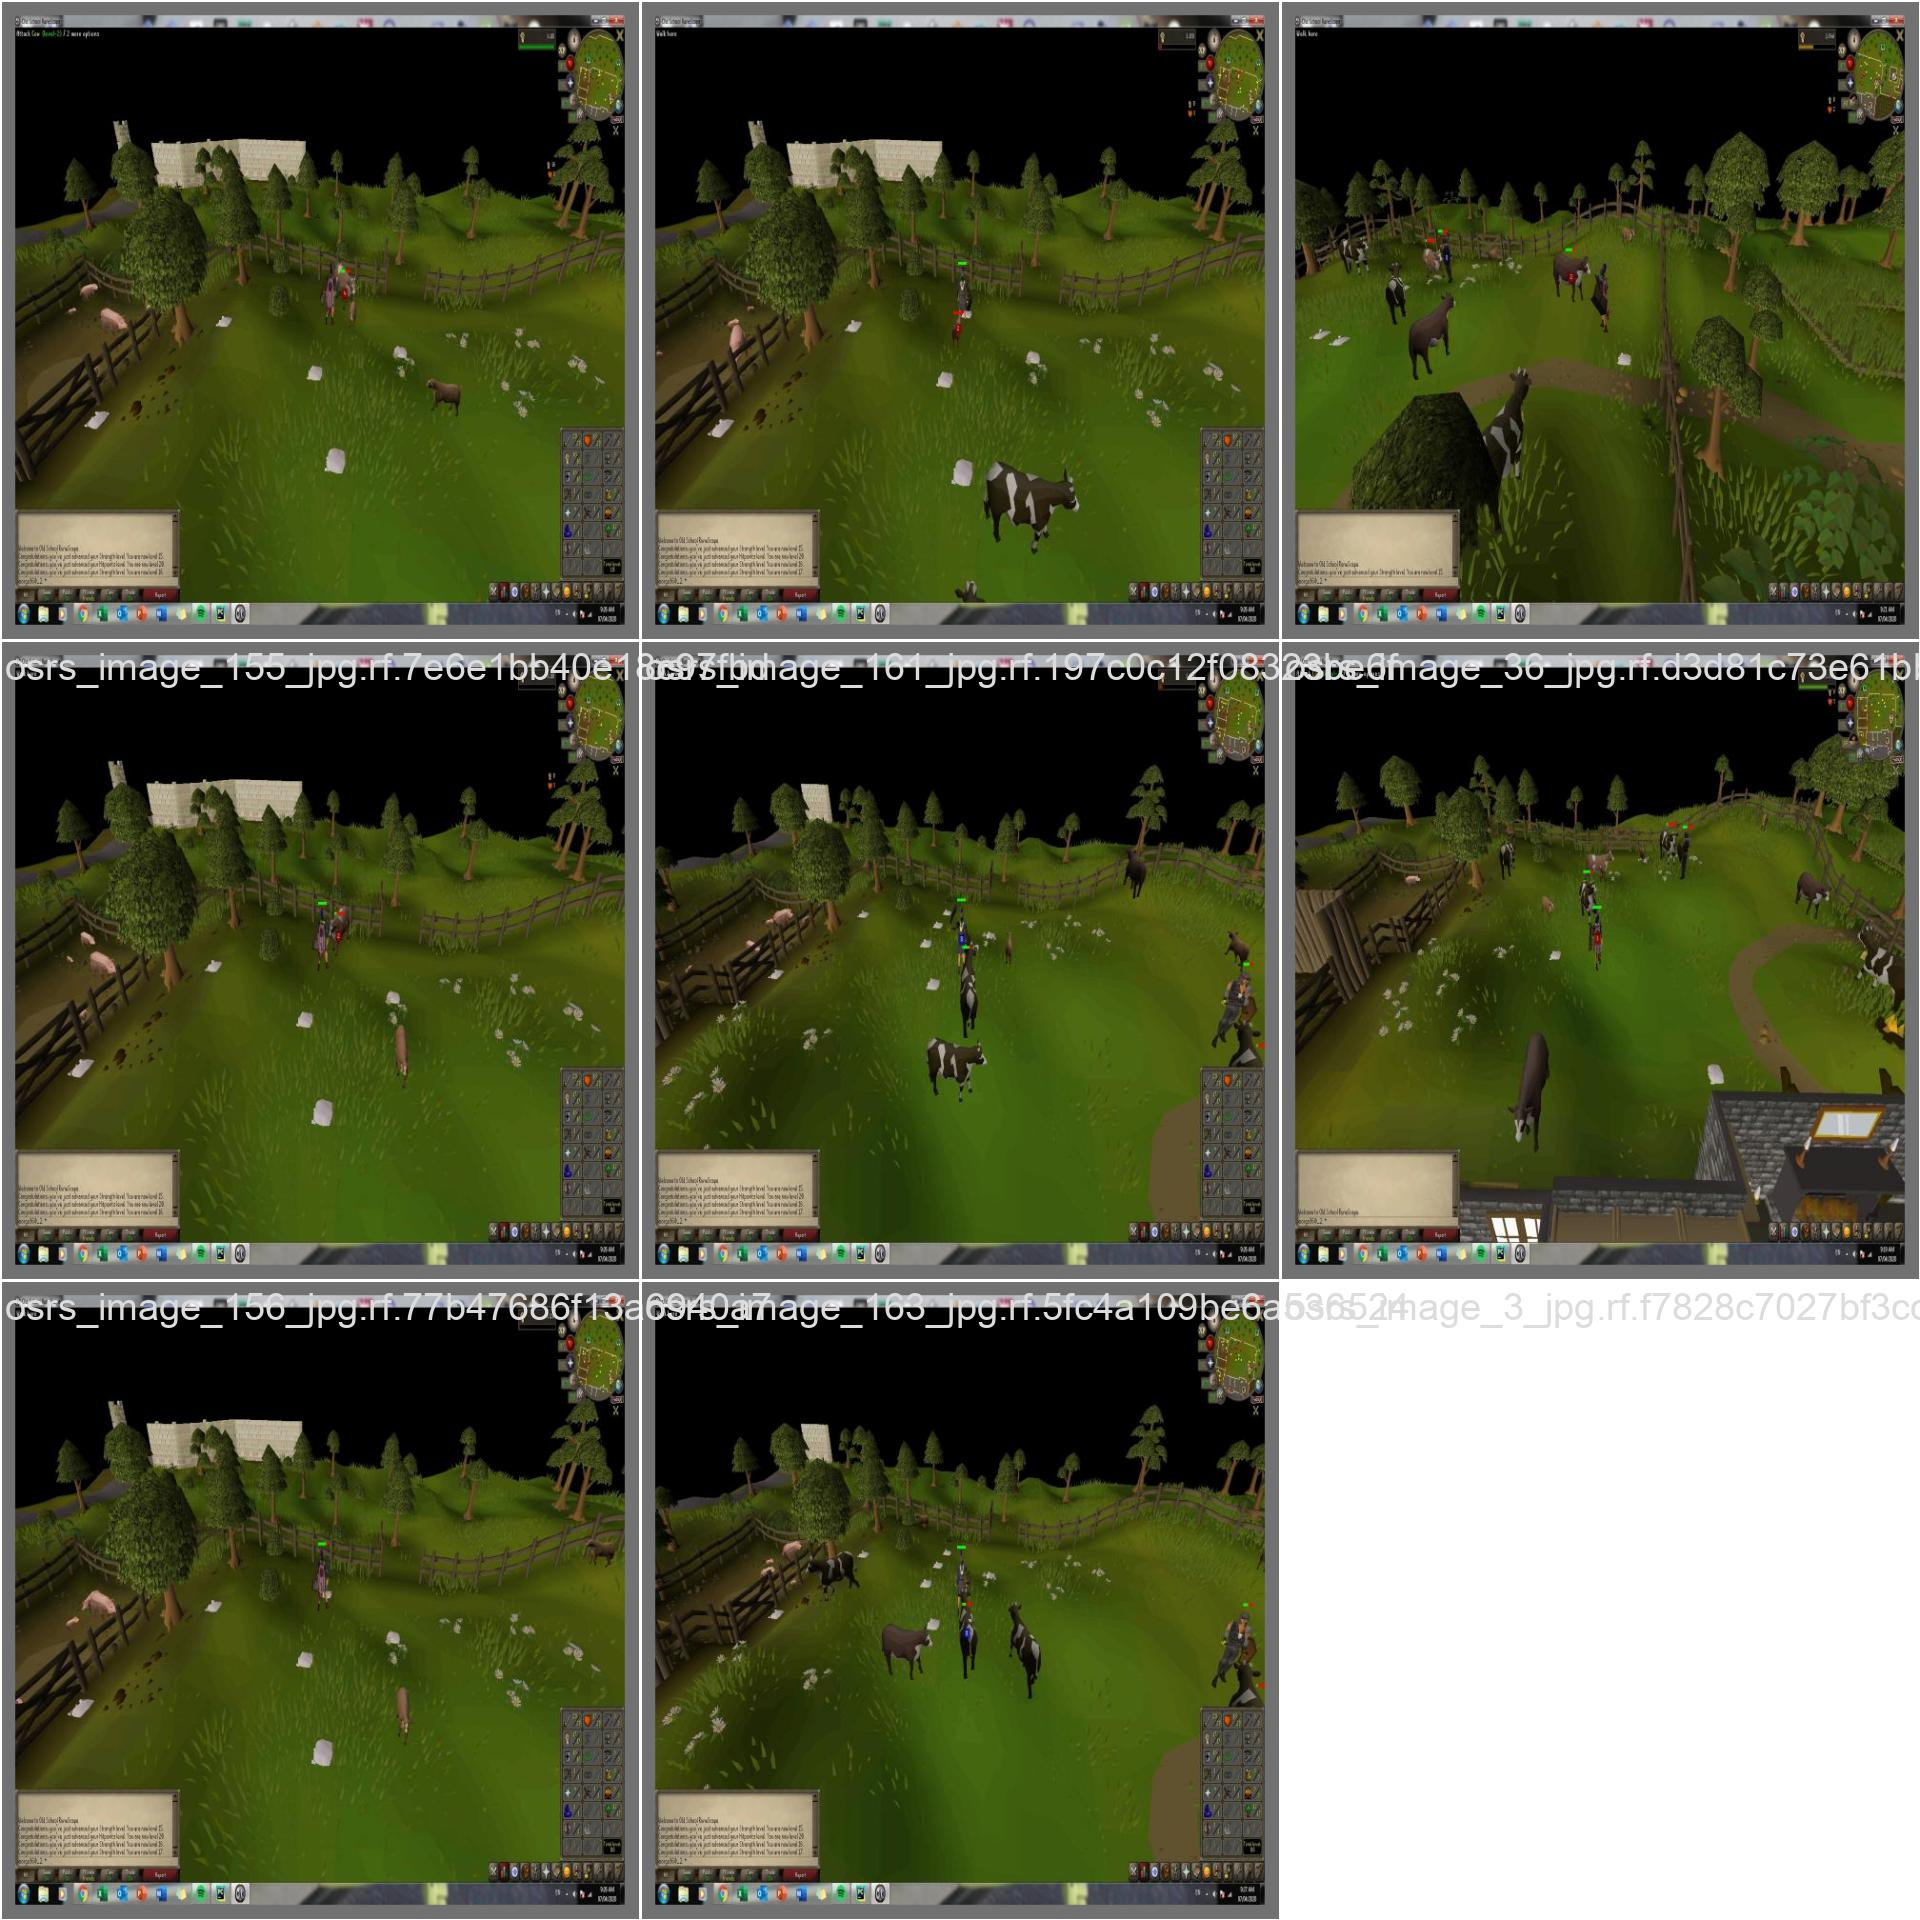

In [ ]:
Image('/content/runs/detect/train/val_batch1_pred.jpg', width = 700, height = 700)

#Video Prediction

Using a trained model we can feed it images, or even mp4 files to make predictions on. Simply pass a video to the model.predict(function). Since we 

In [ ]:
mp4_url = '/content/drive/MyDrive/OSRS_farm_vid.mp4'

In [ ]:
model.predict(mp4_url, save = True)

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Results saved to runs/detect/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([2, 6])
 dtype: torch.float32
  + tensor([[2.31000e+02, 8.30000e+01, 3.20000e+02, 1.72000e+02, 5.60169e-01, 5.60000e+01],
         [9.04000e+02, 7.00000e+00, 1.20600e+03, 2.31000e+02, 3.73676e-01, 7.40000e+01]], device='cuda:0'),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([2, 6])
 dtype: torch.float32
  + tensor([[2.31000e+02, 8.30000e+01, 3.20000e+02, 1.72000e+02, 5.64048e-01, 5.60000e+01],
         [9.04000e+02, 7.00000e+00, 1.20600e+03, 2.31000e+02, 3.75266e-01, 7.40000e+01]], device='cuda:0'),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([3, 6])
 dtype: torch.float32
  + tensor([[2.31000e+02, 8.30000e+01, 3.20000e+02, 1.72000e+02, 5.64982e-01, 5.60000e+01],
         [9.26000e+02, 8.00000e+00, 1.20200e+03, 2.2900

In [ ]:
mp4_url = '/content/runs/detect/predict/OSRS_farm_vid.mp4'

In [ ]:
#!rm -rf /content/runs